In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def cross_entropy(y, y_hat):
    """CE for any two propbability distributions, averages over batch."""
    result = -np.sum(y * np.log(y_hat), axis=-1)   # cross entropy           shape (n_batch,)
    return np.average(result)                      # average over batch      shape: scalar

In [ ]:
xx = []
yy = []

y = np.array([[0, 1]], dtype=float)
for y_hat in np.arange(0.01, 1, 0.01):
    y_hat = np.array([[1-y_hat, y_hat]])
    ce = cross_entropy(y, y_hat)
    print(f'y={y}  y_hat={y_hat}  ce={ce:.2f}')
    
    xx.append(y_hat[0,1])
    yy.append(ce)

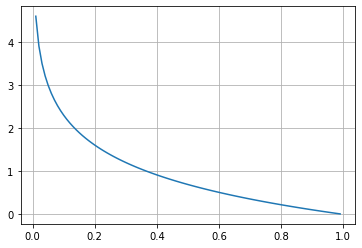

In [29]:
plt.plot(xx, yy)
plt.grid()

In [66]:
def f(pt):
    return 1 - pt

In [67]:
def ce(pt):
    return -1 * np.log(pt)

In [71]:
def g(x, alpha, gamma):
    return alpha * (1-x)**gamma

In [149]:
X = np.arange(0.01, 1.00, 0.01)
Y = np.ones_like(X)

In [150]:
ALPHA = 0.25
GAMMA = 2.0

In [159]:
flk = FocalLossK(alpha=ALPHA, gamma=GAMMA, logits=False, reduce=False)

In [160]:
flp = FocalLossP()

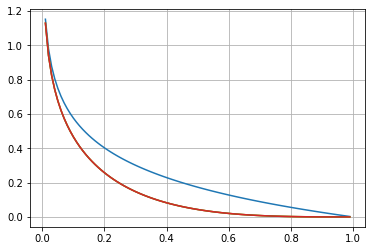

In [161]:
plt.plot(X, ALPHA * ce(X))
plt.plot(X, g(X, alpha=ALPHA, gamma=GAMMA) * ce(X))
plt.plot(X, flk(torch.from_numpy(X), torch.from_numpy(Y)).numpy())
plt.plot(X, flp(torch.from_numpy(X), torch.from_numpy(Y)).numpy())
plt.grid()
plt.show()

In [138]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [147]:
flp = FocalLossP()

In [148]:
flp(X_t, Y_t).numpy()

array([2.84952125e-01, 2.39636021e-01, 2.12634869e-01, 1.93214073e-01,
       1.77990526e-01, 1.65449203e-01, 1.54777671e-01, 1.45488432e-01,
       1.37265386e-01, 1.29891572e-01, 1.23211423e-01, 1.17109466e-01,
       1.11497546e-01, 1.06306771e-01, 1.01482235e-01, 9.69794384e-02,
       9.27617832e-02, 8.87987885e-02, 8.50647806e-02, 8.15379189e-02,
       7.81994578e-02, 7.50331788e-02, 7.20249475e-02, 6.91623651e-02,
       6.64344893e-02, 6.38316096e-02, 6.13450657e-02, 5.89670968e-02,
       5.66907184e-02, 5.45096193e-02, 5.24180752e-02, 5.04108757e-02,
       4.84832631e-02, 4.66308791e-02, 4.48497203e-02, 4.31360989e-02,
       4.14866094e-02, 3.98980991e-02, 3.83676429e-02, 3.68925208e-02,
       3.54701984e-02, 3.40983098e-02, 3.27746420e-02, 3.14971215e-02,
       3.02638022e-02, 2.90728550e-02, 2.79225576e-02, 2.68112861e-02,
       2.57375075e-02, 2.46997724e-02, 2.36967088e-02, 2.27270163e-02,
       2.17894611e-02, 2.08828711e-02, 2.00061318e-02, 1.91581823e-02,
      

In [143]:
g(X, alpha=.25, gamma=2.0) * ce(X)

array([1.12838182e+00, 9.39276724e-01, 8.24830081e-01, 7.41628990e-01,
       6.75912094e-01, 6.21482427e-01, 5.74998501e-01, 5.34444181e-01,
       4.98504940e-01, 4.66273481e-01, 4.37095615e-01, 4.10483021e-01,
       3.86060786e-01, 3.63534267e-01, 3.42667297e-01, 3.23267370e-01,
       3.05175267e-01, 2.88257616e-01, 2.72401436e-01, 2.57510066e-01,
       2.43500065e-01, 2.30298828e-01, 2.17842721e-01, 2.06075602e-01,
       1.94947645e-01, 1.84414382e-01, 1.74435932e-01, 1.64976352e-01,
       1.56003116e-01, 1.47486669e-01, 1.39400054e-01, 1.31718603e-01,
       1.24419663e-01, 1.17482372e-01, 1.10887462e-01, 1.04617088e-01,
       9.86546818e-02, 9.29848249e-02, 8.75931344e-02, 8.24661659e-02,
       7.75913263e-02, 7.29567977e-02, 6.85514690e-02, 6.43648753e-02,
       6.03871445e-02, 5.66089488e-02, 5.30214610e-02, 4.96163162e-02,
       4.63855765e-02, 4.33216988e-02, 4.04175068e-02, 3.76661645e-02,
       3.50611526e-02, 3.25962468e-02, 3.02654982e-02, 2.80632152e-02,
      

In [98]:
class FocalLossK(nn.Module):
    """https://www.kaggle.com/c/tgs-salt-identification-challenge/discussion/65938"""
    def __init__(self, alpha=0.25, gamma=2, logits=False, reduce=True):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.logits = logits
        self.reduce = reduce

    def forward(self, inputs, targets):
        if self.logits:
            BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        else:
            BCE_loss = F.binary_cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduce:
            return torch.mean(F_loss)
        else:
            return F_loss

In [158]:
class FocalLossP(nn.Module):
    """https://github.com/kuangliu/pytorch-retinanet/blob/master/loss.py"""
    def __init__(self):
        super().__init__()

    def forward(self, x, y):
        '''Focal loss.
        Args:
          x: (tensor) sized [N,D].
          y: (tensor) sized [N,].
        Return:
          (tensor) focal loss.
        '''
        alpha = 0.25
        gamma = 2

        t = y
        p = x
        
        pt = p*t + (1-p)*(1-t)         # pt = p if t > 0 else 1-p
        w = alpha*t + (1-alpha)*(1-t)  # w = alpha if t > 0 else 1-alpha
        w = w * (1-pt).pow(gamma)
        return F.binary_cross_entropy(x, t, w, reduction='none')